# Evaluate permeation regimes

In [1]:
K_r = 10 # m4 s-1
K_d = 100 # m-2 s-1 Pa-0.5
K_s = (K_d / K_r) ** 0.5 # m-3 Pa-0.5
e = 1 # m
D = 2 # m2 s-1


In [2]:
from festim_scripts import compute_permeation_flux
import numpy as np

pressure_test_values = np.geomspace(1e-6, 1e06, num=11)

for P_up in pressure_test_values:
    print(f" ---- P = {P_up:.2e} Pa ----")
    compute_permeation_flux(
        T=300,
        upstream_pressure=P_up,
        foldername=f"results/regime_testing/varing_P/P={P_up:.1e}/",
        final_time=100,
        sample_thickness=e,
        D_0=D,
        E_D=0,
        Kr_0=K_r,
        E_Kr=0,
        Kd_0=K_d,
        E_Kd=0,
        )

 ---- P = 1.00e-06 Pa ----
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+02 s    Elapsed time so far: 4.8 s
 ---- P = 1.58e-05 Pa ----
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+02 s    Elapsed time so far: 2.8 s
 ---- P = 2.51e-04 Pa ----
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+02 s    Elapsed time so far: 1.1 s
 ---- P = 3.98e-03 Pa ----
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+02 s    Elapsed time so far: 1.1 s
 ---- P = 6.31e-02 Pa ----
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+02 s    Elapsed time

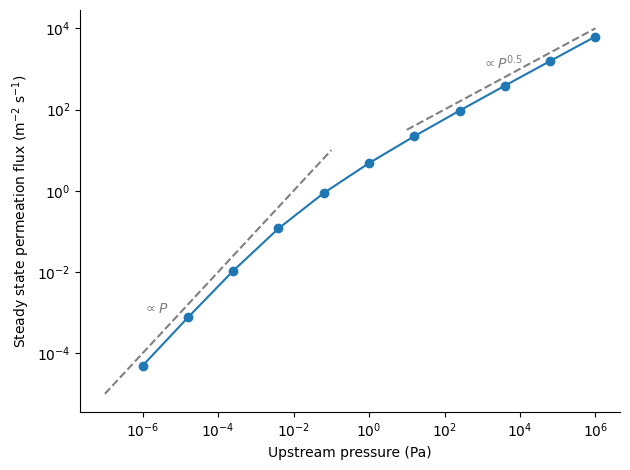

In [3]:
import matplotlib.pyplot as plt

fluxes = []

for P_up in pressure_test_values:
    data = np.genfromtxt(
        f"results/regime_testing/varing_P/P={P_up:.1e}/permeation_standard.csv", delimiter=",", names=True
    )
    fluxes.append(data["solute_flux_surface_2_H_m2_s1"])


steady_state_fluxes = np.abs([flux.data[-1] for flux in fluxes])

plt.plot(pressure_test_values, steady_state_fluxes, marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Upstream pressure (Pa)")
plt.ylabel(r"Steady state permeation flux (m$^{-2}$ s$^{-1}$)")


Ps_linear = np.logspace(-7, -1)
Ps_squared = np.logspace(1, 6)
plt.plot(Ps_linear, Ps_linear * 100, linestyle="--", color="gray")
plt.plot(Ps_squared, Ps_squared**0.5 * 10, linestyle="--", color="gray")

plt.annotate(r"$\propto P$", (1e-6, 1e-3), color="gray")
plt.annotate(r"$\propto P^{0.5}$", (1e3, 1e3) , color="gray")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()

plt.show()

In [4]:
def W_to_pressure(W):
    return ((W * D * K_s) / (K_d * e)) ** 2


W_test_values = np.geomspace(1e-2, 1e02, num=11)

pressure_test_values = W_to_pressure(W=W_test_values)

for P_up in pressure_test_values:
    print(f" ---- P = {P_up:.2e} Pa ----")
    compute_permeation_flux(
        T=300,
        upstream_pressure=P_up,
        foldername=f"results/regime_testing/varing_W/P={P_up:.1e}/",
        final_time=100,
        sample_thickness=e,
        D_0=D,
        E_D=0,
        Kr_0=K_r,
        E_Kr=0,
        Kd_0=K_d,
        E_Kd=0,
    )


 ---- P = 4.00e-07 Pa ----
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+02 s    Elapsed time so far: 1.5 s
 ---- P = 2.52e-06 Pa ----
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+02 s    Elapsed time so far: 1.5 s
 ---- P = 1.59e-05 Pa ----
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+02 s    Elapsed time so far: 1.4 s
 ---- P = 1.00e-04 Pa ----
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+02 s    Elapsed time so far: 1.3 s
 ---- P = 6.34e-04 Pa ----
Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+02 s    Elapsed time

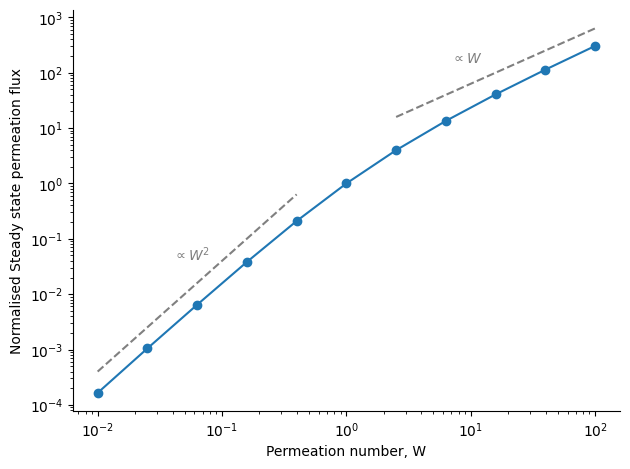

In [5]:

fluxes = []

for P_up in pressure_test_values:
    data = np.genfromtxt(
        f"results/regime_testing/varing_W/P={P_up:.1e}/permeation_standard.csv", delimiter=",", names=True
    )
    fluxes.append(data["solute_flux_surface_2_H_m2_s1"])


steady_state_fluxes = np.abs([flux.data[-1] for flux in fluxes])

normalised_fluxes = steady_state_fluxes / steady_state_fluxes[5]

plt.plot(W_test_values, normalised_fluxes, marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Permeation number, W")
plt.ylabel("Normalised Steady state permeation flux")


Ps_linear = W_test_values[:5]
W_linear = W_to_pressure(W=Ps_linear)
Ps_squared = W_test_values[6:]
W_squared = W_to_pressure(W=Ps_squared)

plt.plot(Ps_linear, W_linear * 1000, linestyle="--", color="gray")
plt.plot(Ps_squared, W_squared**0.5 * 100, linestyle="--", color="gray")

plt.annotate(r"$\propto W$", (7e0, 1.5e2), color="gray")
plt.annotate(r"$\propto W^{2}$", (4e-2, 4e-2), color="gray")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()

plt.show()